<a href="https://colab.research.google.com/github/ShubhamDeshmukh27/Time--Analysis/blob/main/Time_series_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

####**Import**

In [714]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
%matplotlib inline
import seaborn as sns
import pandas as pd 
from datetime import date, timedelta
import holidays
from calendar import monthrange
import plotly.express as px 
import seaborn as sns

In [715]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [716]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yes Bank Stock Price prediction/data_YesBank_StockPrices.csv')

In [717]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [718]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [719]:
df.shape

(185, 5)

In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [721]:
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Mar-18,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [722]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [723]:
# Importing datetime 
from datetime import datetime
# converting date to proper format of date
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [724]:
# setting date column as an index
df.set_index('Date',inplace=True)
df.index.freq = 'MS'

##**EDA**

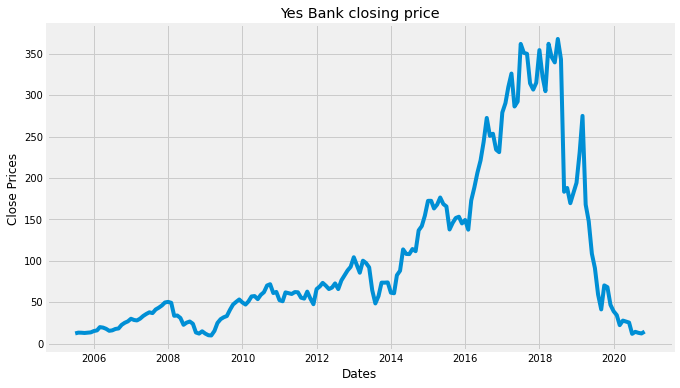

In [568]:
#plotting close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices ')
plt.plot(df['Close'])
plt.title('Yes Bank closing price')
plt.show()

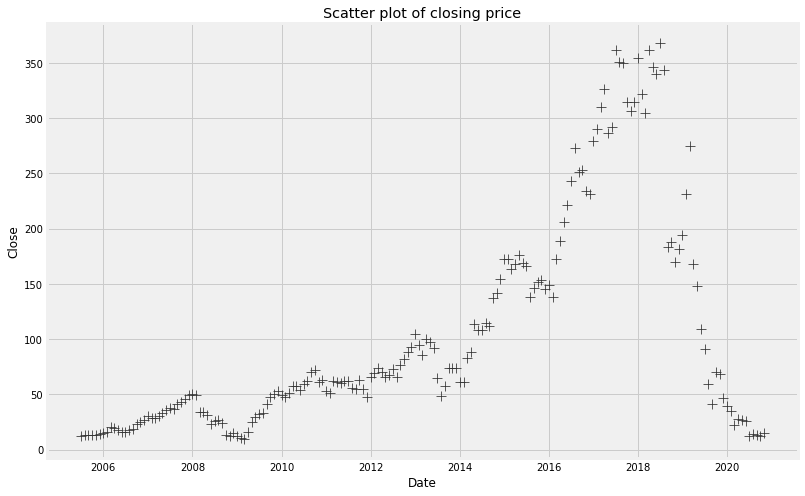

In [569]:
# Plotting Scatter plot of close price
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Date", y="Close", s=100, color=".2", marker="+")
plt.title('Scatter plot of closing price')
plt.show()

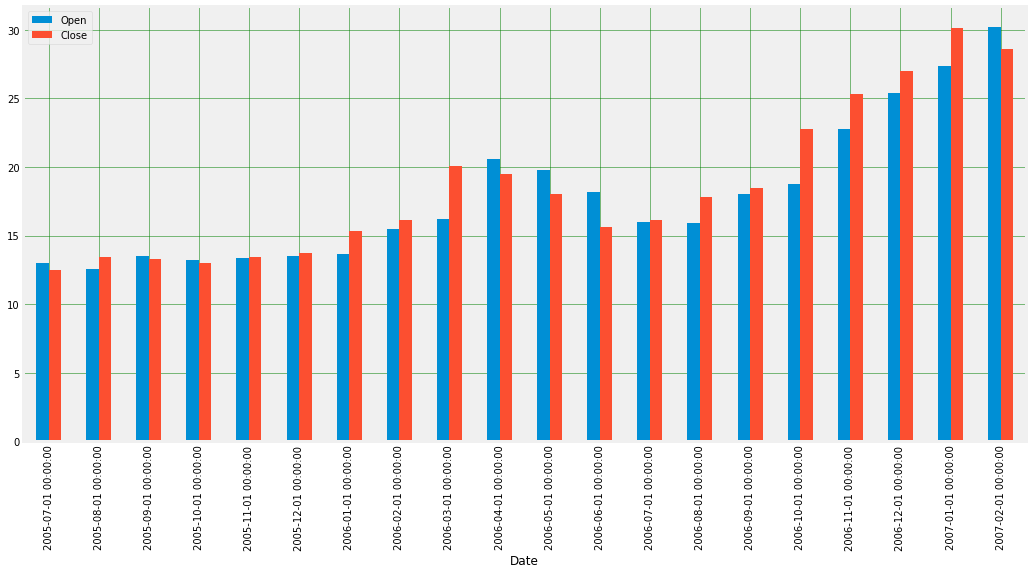

In [570]:
#Plot Open vs Close
df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [571]:
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

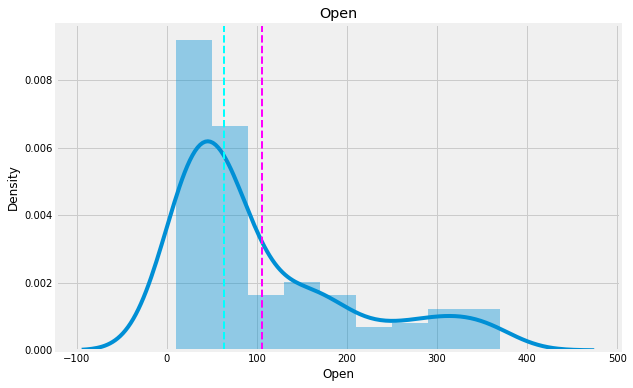

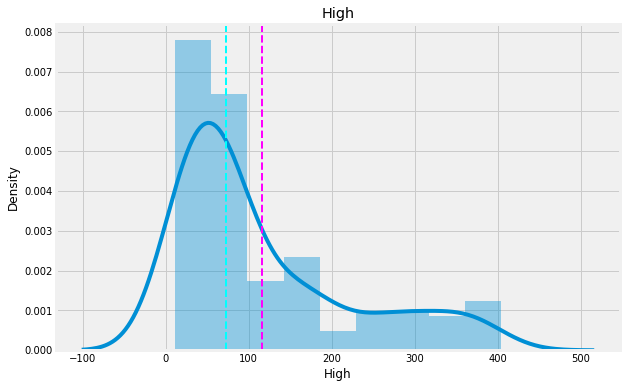

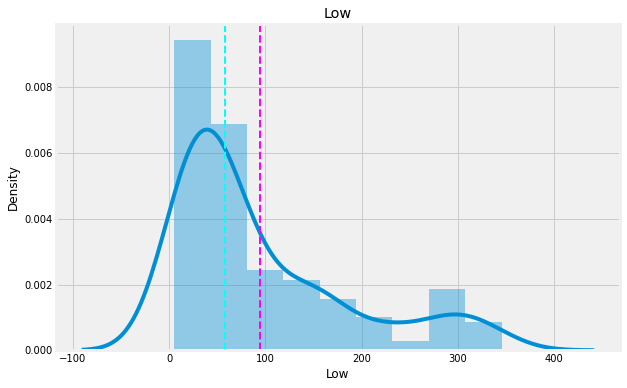

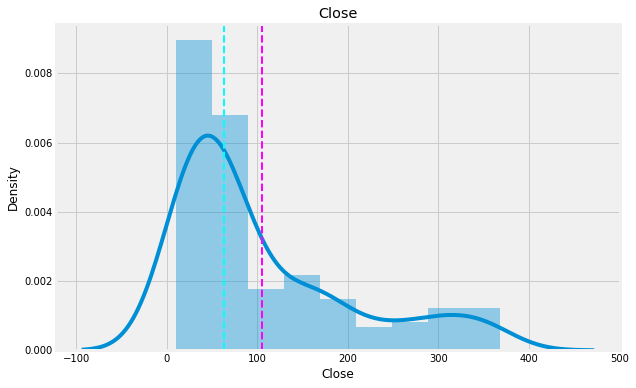

In [572]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

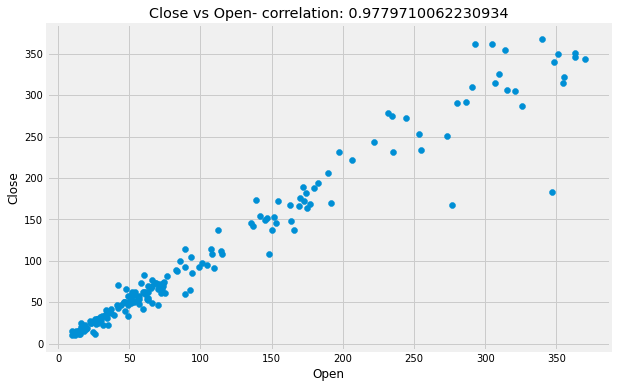

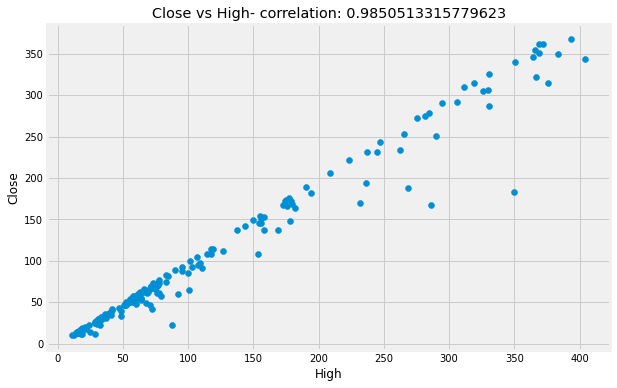

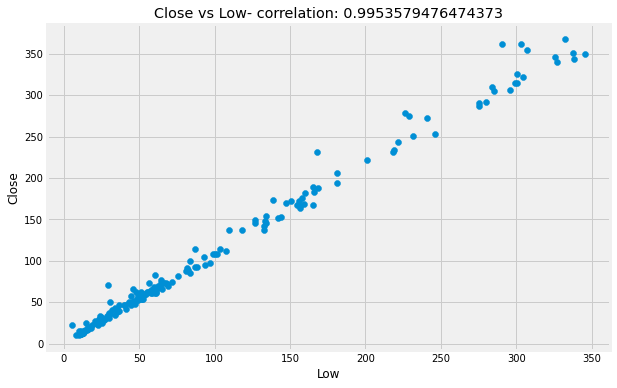

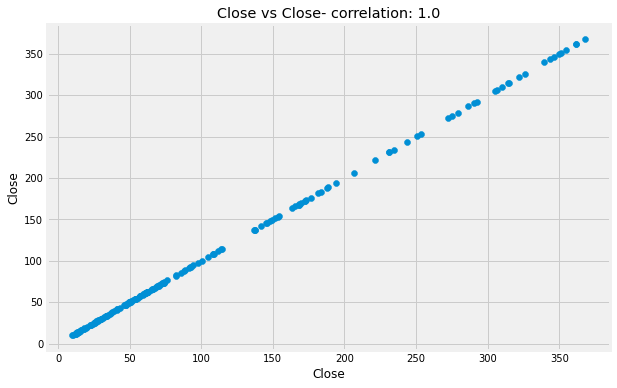

In [573]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=df[col]
  label=df['Close']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' +col +'- correlation: '+ str(correlation))

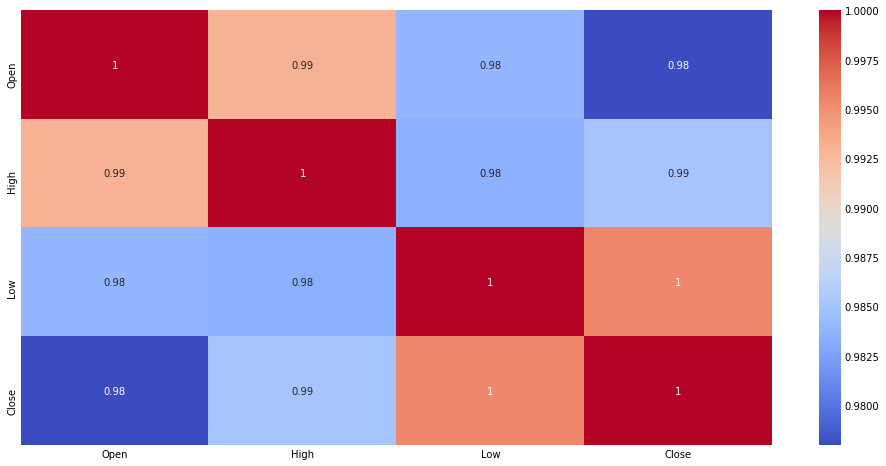

In [574]:
## Correlation
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##**Modelling**

In [575]:
# # x is independent variables and y is dependent variables
from scipy.stats import zscore
X = df.drop(columns=['Close']).apply(zscore)

In [576]:
y = np.log(df['Close'])

In [577]:
# Breaking off validation set or test set from training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)

In [578]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


In [579]:
##Import libraries for classifiers
import math
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

In [580]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [581]:
y_pred=lr_model.predict(X_test)

In [582]:
lasso  = Lasso(alpha=0.010 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [583]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [584]:
y_pred_l = lasso.predict(X_test)

In [585]:
print("MSE :",mean_squared_error(y_test, y_pred_l))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_l)))
print("MAE :",mean_absolute_error(y_test, y_pred_l))
print("R2 :",metrics.r2_score(y_test, y_pred_l))

MSE : 0.16979450921198339
RMSE : 0.41206129302809236
MAE : 0.35059764622064893
R2 : 0.8200828459676572


In [586]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [587]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [588]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",metrics.r2_score(y_test, y_pred_lasso))

MSE : 0.16979450921198339
RMSE : 0.41206129302809236
MAE : 0.35059764622064893
R2 : 0.8200828459676572


In [589]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.005)

In [590]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [591]:
ridge.score(X_train, y_train)

0.8146653132705723

In [592]:
y_pred_r = ridge.predict(X_test)

In [593]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_r))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_r)))
print("MAE :",mean_absolute_error(y_test, y_pred_r))
print("R2 :",metrics.r2_score(y_test, y_pred_r))

MSE : 0.16746948593263167
RMSE : 0.4092303580291077
MAE : 0.34836522675121967
R2 : 0.8225464802360519


In [594]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [595]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -0.19213460468887036


In [596]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [597]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",metrics.r2_score(y_test, y_pred_ridge))

MSE : 0.17460972631724542
RMSE : 0.41786328663481004
MAE : 0.3541738283648222
R2 : 0.8149805599064218


In [598]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 1)
knn_model=knn_regressor.fit(X_train,y_train)
y_knn_pred=knn_model.predict(X_test)

In [599]:
knn_kfold = model_selection.KFold(n_splits=7, random_state=42)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  92.59004884004884


In [600]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(X_train,y_train)
y_svm_pred=svm_model.predict(X_test)

##**Evaluating**

In [601]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,2)
        df.loc[i,"MSE"]=round(MSE,2)
        df.loc[i,"RMSE"]=round(RMSE,2)
        df.loc[i,"MAPE"]=round(MAPE,2)
        df.loc[i,"Rsquare"]=round(Rsquare,2)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['MAPE'],ascending=True,inplace=True)
    
    return df

In [602]:
models=[lr_model,knn_regressor,svm_regressor]

In [603]:
report=score_model(X_train,y_train,X_test,y_test)
report

,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
1,KNeighborsRegressor,0.06,0.01,0.09,1.81,0.99
0,LinearRegression,0.35,0.17,0.41,9.54,0.82
2,SVR,0.33,0.20,0.45,9.87,0.79


In [604]:
y_pred = knn_regressor.predict(X_test)
y_pred_1=lr_model.predict(X_test)
y_pred_2=svm_model.predict(X_test)

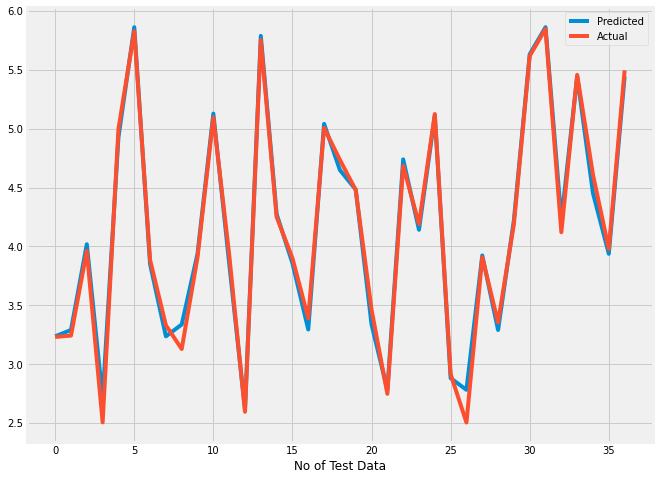

In [605]:
plt.figure(figsize=(10,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

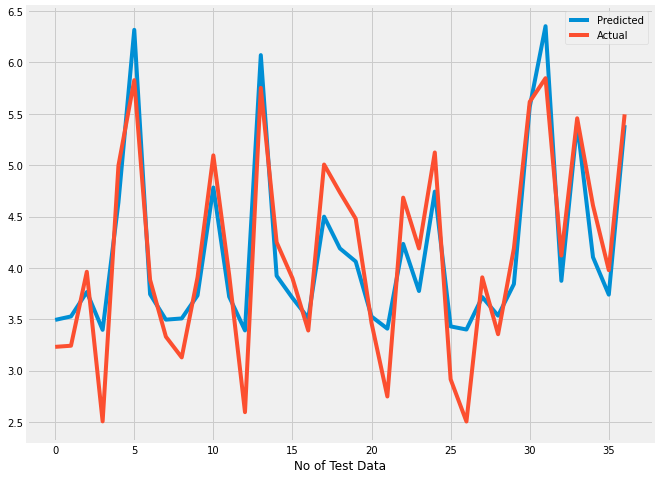

In [606]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_1)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

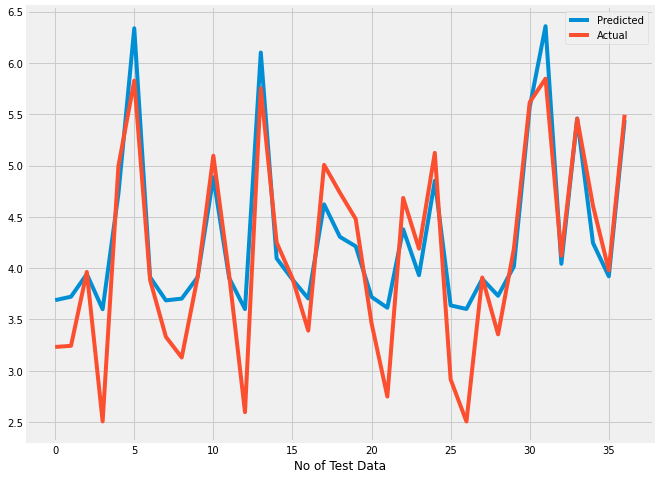

In [607]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_2)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##**ARIMA**

In [608]:
#Installing 'pmdarima'
!pip install pmdarima

No handles with labels found to put in legend.


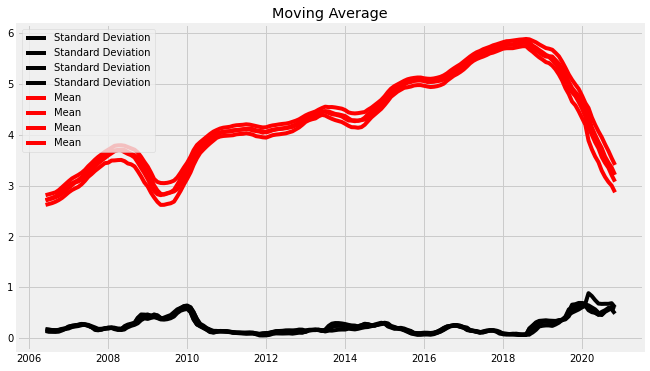

In [609]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
new_df = np.log(df)
moving_avg = new_df.rolling(12).mean()
std_dev = new_df.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [610]:
# check pmdarima
#from pmdarima.arima import auto_arima

In [611]:
#df = df[["Close"]].copy()

In [612]:
#new_df = np.log(df)

An ARIMA model is characterized by 3 terms (p, d, q):

- p is the order of the AR term

- d is the number of differencing required to make the time series stationary

- q is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.


### Stationarity

Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple times. 

And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model. 

##ADF Test

We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [651]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(new_df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.433267914089931
p-value: 0.5662272822048067


In [652]:
from statsmodels.graphics.tsaplots import plot_acf

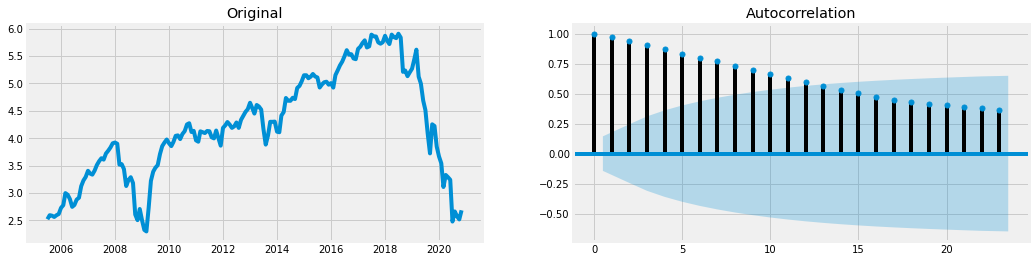

In [653]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(new_df.Close)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(new_df.Close, ax=ax2);

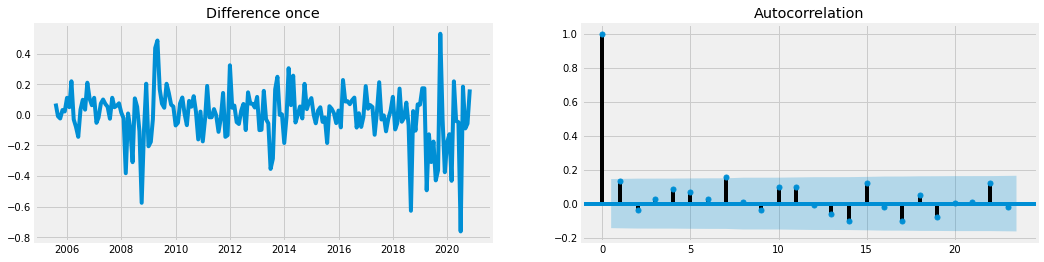

In [654]:
diff = new_df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

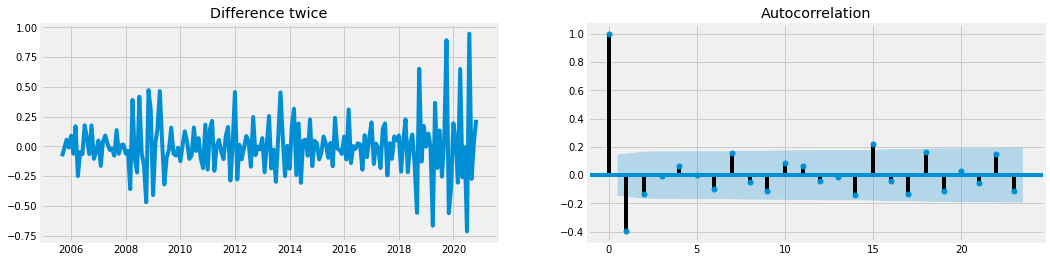

In [655]:
diff =new_df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);

We can use the pmdarima package to get the number of differencing.

In [656]:

from pmdarima.arima.utils import ndiffs

In [657]:
ndiffs(new_df.Close, test="adf")

1

#### p

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors. 

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags. 

In [658]:
from statsmodels.graphics.tsaplots import plot_pacf

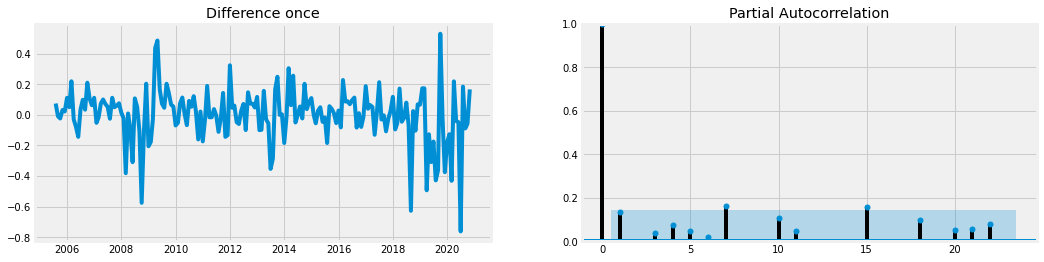

In [659]:
diff = new_df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

We can observe that the PACF lag 1 is significant as it's above the significance line.

#### q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.

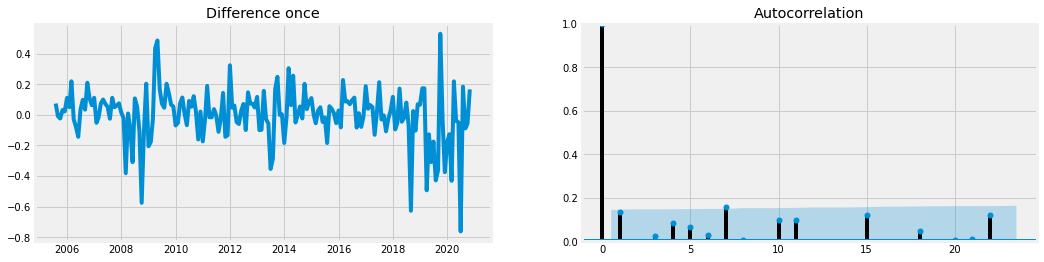

In [660]:
diff = new_df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [661]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Model
model = ARIMA(new_df.Close, order=(6,0, 5))
result = model.fit(disp=-1)
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  185
Model:                     ARMA(6, 5)   Log Likelihood                  72.270
Method:                       css-mle   S.D. of innovations              0.160
Date:                Wed, 04 Aug 2021   AIC                           -118.540
Time:                        04:33:07   BIC                            -76.675
Sample:                    07-01-2005   HQIC                          -101.573
                         - 11-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.6737      0.701      5.239      0.000       2.299       5.048
ar.L1.Close     1.0133      0.170      5.962      0.000       0.680       1.346
ar.L2.Close     0.7256      0.322      2.250    

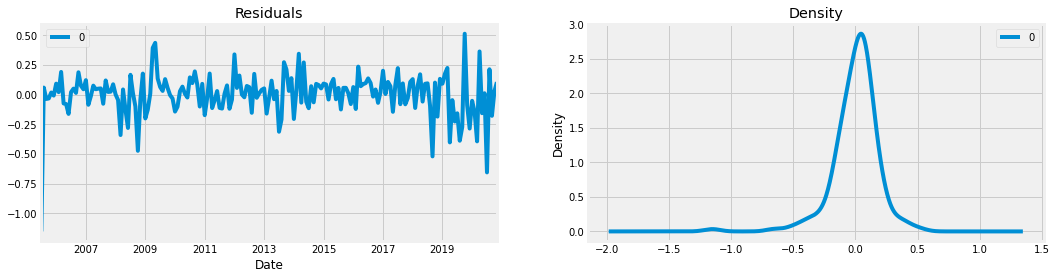

In [662]:
# Plot residual errors
residual = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2,figsize=(16,4))
residual.plot(title="Residuals", ax=ax[0])
residual.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

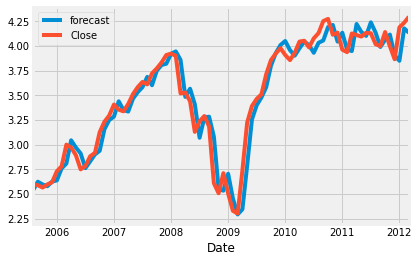

In [663]:
# Actual vs Fitted
result.plot_predict(
    start=1,
    end=80,
    dynamic=False);

129
56


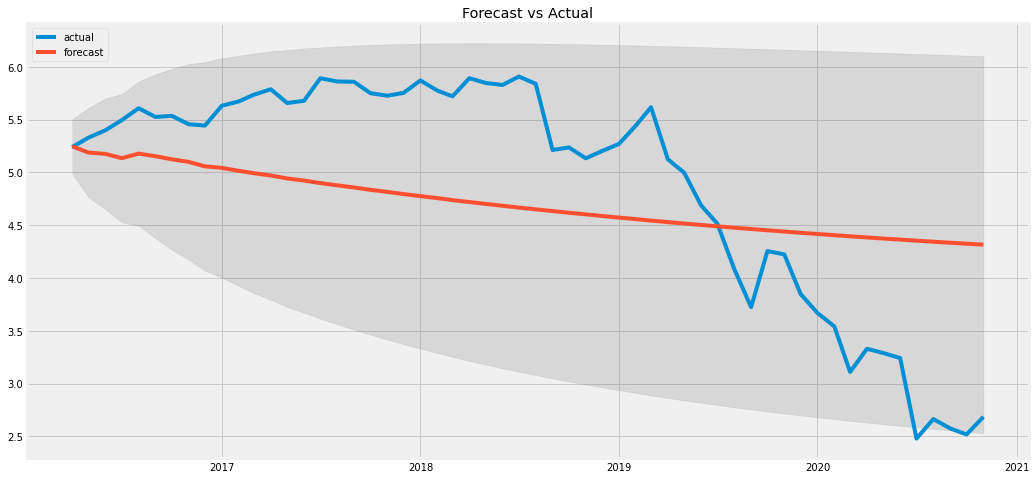

In [664]:
n = int(len(new_df) * 0.70)
train = new_df.Close[:n]
test = new_df.Close[n:]
print(len(train))
print(len(test))


step = 56
model = ARIMA(train, order=(6, 0, 5))
result = model.fit(disp=-1)

# Forecast
fc, se, conf = result.forecast(step)
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [665]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(test, fc)

{'acf1': 0.9320871888086008,
 'corr': 0.7370254134928292,
 'mae': 0.8038407954019161,
 'mape': 0.1741228551226052,
 'me': 0.1955643978890437,
 'minmax': 0.15823646827377502,
 'mpe': 0.03489344569145076,
 'rmse': 0.9170913846121032}

In [666]:
# Accuracy
errors = abs(fc - test)
mape = 100 * (errors / test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.8 %.


In [710]:
import fbprophet

In [725]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [726]:
df.reset_index('Date',inplace=True)

In [727]:
df.rename(columns={'Date':'ds','Close':'y'},inplace=True)

In [728]:
stock_df=df[['ds', 'y']].copy()

In [729]:
stock_df.head()

,ds,y
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41


In [730]:
# Importing FBPROPHET
from fbprophet import Prophet

In [731]:
### intiialize the Model
# df['y'] = np.log(df['y'])
model = Prophet()
model.fit(stock_df)# fit the model using all data
future = model.make_future_dataframe(periods=60, freq='MS') # 'MS' used here is month-start, means the data point is placed on the start of each month.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


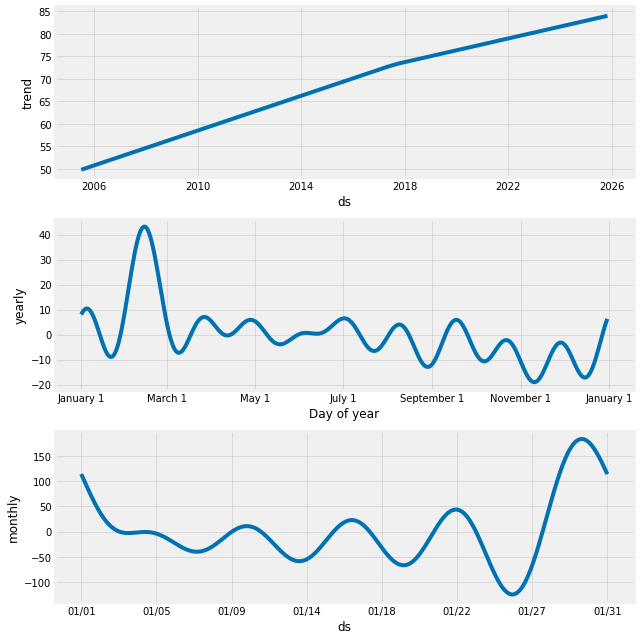

In [732]:
model = Prophet(weekly_seasonality=False)# the Prophet class (model)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5) # Adding seasonality as monthly, because we require the monthly prediction  
forecast = model.fit(stock_df).predict(future)# fit the model using all data and predicting future
# Let's plot the components of our model
model.plot_components(forecast);

In [733]:
# Let's see the components of our model
model.component_modes

{'additive': ['monthly',
  'yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [734]:
future.tail()

,ds
240,2025-07-01
241,2025-08-01
242,2025-09-01
243,2025-10-01
244,2025-11-01


In [735]:
### Prediction on future data
prediction=model.predict(future)

In [736]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-01,49.831499,-58.118968,90.994920,49.831499,49.831499,-31.982298,-31.982298,-31.982298,-38.463627,-38.463627,-38.463627,6.481329,6.481329,6.481329,0.0,0.0,0.0,17.849201
1,2005-08-01,49.995517,-56.182246,88.350063,49.995517,49.995517,-32.134399,-32.134399,-32.134399,-31.377087,-31.377087,-31.377087,-0.757312,-0.757312,-0.757312,0.0,0.0,0.0,17.861119
2,2005-09-01,50.159536,-55.219720,90.387971,50.159536,50.159536,-31.143799,-31.143799,-31.143799,-19.441884,-19.441884,-19.441884,-11.701915,-11.701915,-11.701915,0.0,0.0,0.0,19.015736
3,2005-10-01,50.318263,-60.476928,87.470861,50.318263,50.318263,-38.755794,-38.755794,-38.755794,-31.377087,-31.377087,-31.377087,-7.378707,-7.378707,-7.378707,0.0,0.0,0.0,11.562470
4,2005-11-01,50.482282,-48.345105,97.292304,50.482282,50.482282,-30.069317,-30.069317,-30.069317,-19.441884,-19.441884,-19.441884,-10.627433,-10.627433,-10.627433,0.0,0.0,0.0,20.412965


In [737]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2005-07-01,17.849201,-58.118968,90.994920
1,2005-08-01,17.861119,-56.182246,88.350063
2,2005-09-01,19.015736,-55.219720,90.387971
3,2005-10-01,11.562470,-60.476928,87.470861
4,2005-11-01,20.412965,-48.345105,97.292304


In [738]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
240,2025-07-01,113.635043,37.469792,188.214529
241,2025-08-01,74.930744,1.763845,157.378487
242,2025-09-01,24.849136,-49.930894,94.083075
243,2025-10-01,68.528607,-9.113502,147.608816
244,2025-11-01,26.142876,-48.925928,104.769066


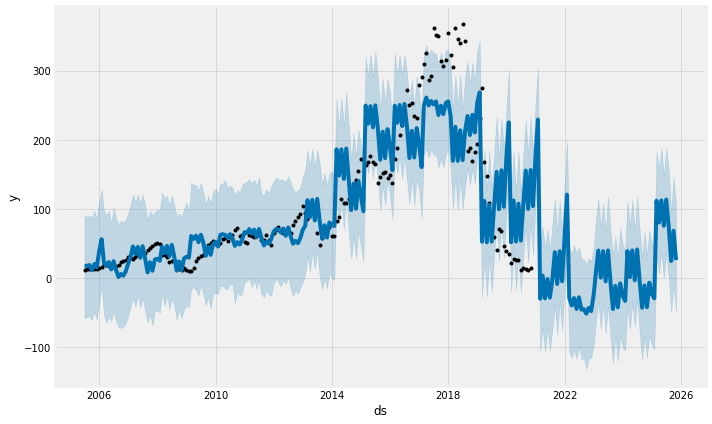

In [739]:
#### plot the predicted projection
model.plot(prediction);

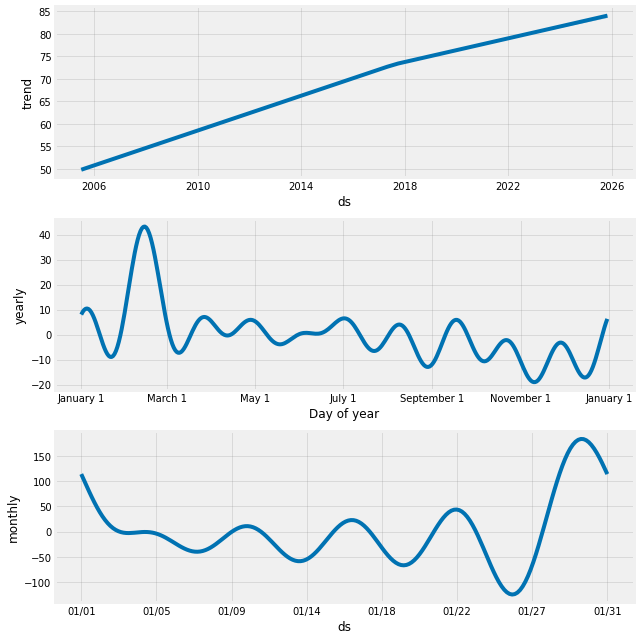

In [740]:
## Visualize Each Components[Trends,Weekly]
model.plot_components(prediction);

In [741]:
from fbprophet.diagnostics import cross_validation

In [742]:
crv_df=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 24 forecasts with cutoffs between 2008-07-02 00:00:00 and 2019-11-02 00:00:00


In [743]:
crv_df.shape

(288, 6)

In [744]:
crv_df.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-08-01,40.245191,38.998812,41.509009,26.83,2008-07-02
1,2008-09-01,41.067000,39.820610,42.291680,24.13,2008-07-02
2,2008-10-01,40.789432,39.528769,41.973403,13.58,2008-07-02
3,2008-11-01,42.973994,41.625082,44.173921,12.26,2008-07-02
4,2008-12-01,40.762470,39.421538,42.154409,15.03,2008-07-02


In [745]:
crv_df.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
283,2020-07-01,129.299625,69.524209,185.231470,11.95,2019-11-02
284,2020-08-01,182.016747,118.113566,242.510510,14.37,2019-11-02
285,2020-09-01,224.775941,164.656719,282.860727,13.15,2019-11-02
286,2020-10-01,174.543406,109.825053,237.140815,12.42,2019-11-02
287,2020-11-01,225.362603,164.438017,285.081491,14.67,2019-11-02


In [746]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(crv_df)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days,2909.646693,53.941141,32.995170,0.445647,0.209830,0.464286
1,39 days,2827.846854,53.177503,31.325250,0.381288,0.154778,0.500000
2,40 days,2823.260689,53.134364,31.181460,0.369197,0.154778,0.500000
3,41 days,3005.183478,54.819554,33.352355,0.377365,0.183549,0.464286
4,44 days,3002.675408,54.796673,33.301062,0.380515,0.207394,0.428571


In [747]:
# Importing plot_cross_validation_metric for plotting matrics
from fbprophet.plot import plot_cross_validation_metric

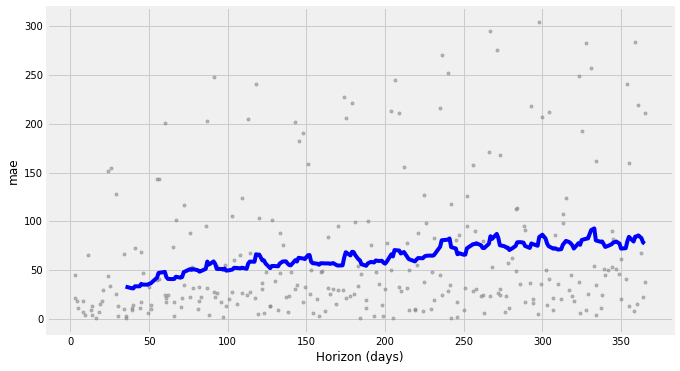

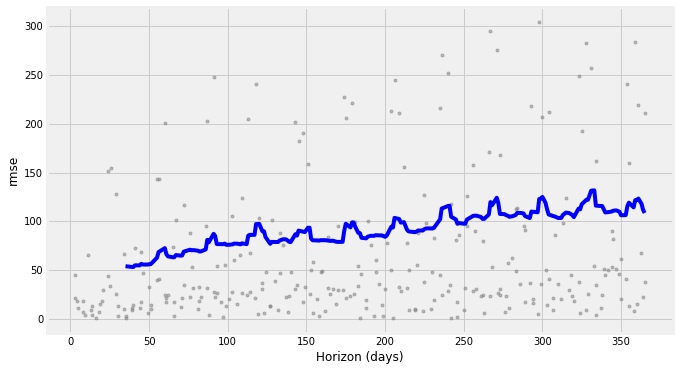

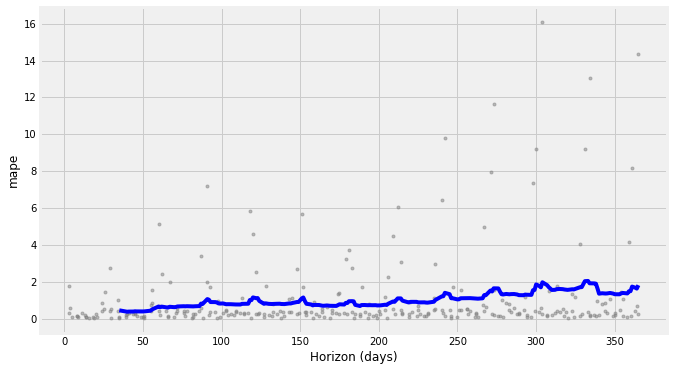

In [765]:
# plot MAE (Mean Absolute Error)
fig=plot_cross_validation_metric(crv_df,metric='mae')
# plot MAE (Root Mean Square Error)
fig=plot_cross_validation_metric(crv_df,metric='rmse')
# plot MAE (Mean Absolute Percentage Error)
fig=plot_cross_validation_metric(crv_df,metric='mape')

In [766]:
n = int(len(crv_df) * 0.70)
df_train = crv_df[:n]
df_test = crv_df[n:]
print(len(df_train))
print(len(df_test))

201
87


In [767]:
import fbprophet as fbp
# Instantiate prophet 
fbprophet_model= fbp.Prophet()
# fit the training data 
fbprophet_model.fit(df_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [768]:
forecast = fbprophet_model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
82,2020-07-01,421.417890,397.530801,456.041584,400.394031,441.886188,6.463184,6.463184,6.463184,6.463184,6.463184,6.463184,0.0,0.0,0.0,427.881073
83,2020-08-01,425.841575,402.924572,462.536482,403.935512,446.711599,8.084791,8.084791,8.084791,8.084791,8.084791,8.084791,0.0,0.0,0.0,433.926366
84,2020-09-01,430.265261,400.634403,465.480656,407.544584,452.374388,2.106372,2.106372,2.106372,2.106372,2.106372,2.106372,0.0,0.0,0.0,432.371633
85,2020-10-01,434.546247,405.921224,469.153210,411.125584,457.367410,3.017909,3.017909,3.017909,3.017909,3.017909,3.017909,0.0,0.0,0.0,437.564156
86,2020-11-01,438.969933,403.518230,471.074737,414.976883,462.378178,-2.417971,-2.417971,-2.417971,-2.417971,-2.417971,-2.417971,0.0,0.0,0.0,436.551962


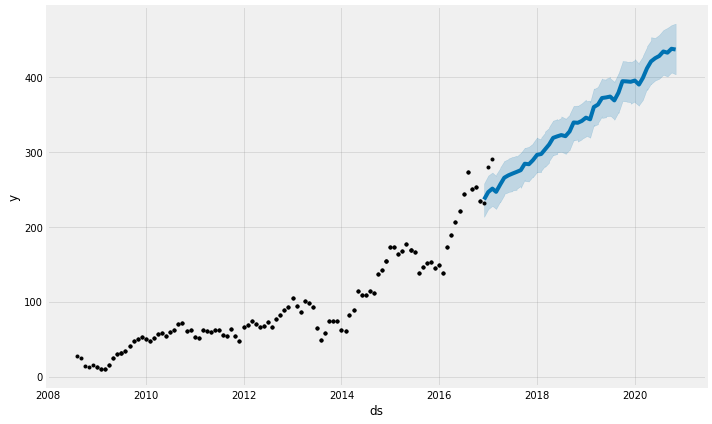

In [769]:
fbprophet_model.plot(forecast);